In [1]:
import pandas as pd
import CounterFactualGenerator as cf
import numpy as np
%load_ext autoreload
%autoreload 2

dataset =  pd.read_csv("data/aug_train.csv")
dataset.drop(["gender","enrollee_id","city"],axis = 1, inplace=True)
dataset.dropna(inplace=True)
import warnings
warnings.filterwarnings("ignore")

In [2]:
cf_data = cf.CFData(dataset,"target")
cf_data.get_feature_weights()

#CFData provides already encoded data for training
data=cf_data.get_training_data()


In [3]:
from sklearn.model_selection import train_test_split

y = data["target"]
x = data.drop(["target"],axis=1)

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2)
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
print("Training Accuracy :", rfc.score(x_train, y_train))

Training Accuracy : 0.9988818069998882


In [4]:
import CounterFactualGenerator as cf

#cf_data.feature_weights[0]=200

In [5]:
cf_data.get_feature_weights()
cf_data.set_feature_weight("company_type",20)

In [6]:
cf_gen = cf.CFGenerator(0,[0.5,1],cf_data,rfc.predict,pop_size=1000,elite_count=150)
cf_gen.generate_counterfactuals(5)
#outcome HEAVILY depends on used metrics

,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.776,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47.0,0.0
1,0.800,-,-,-,-,13,-,-,1,-,1.0
2,0.800,-,-,-,-,12,-,-,1,-,1.0
3,0.600,-,-,-,-,-,-,-,-,-,1.0
4,0.600,-,-,-,-,11,-,-,-,-,1.0
5,0.600,-,-,-,-,1,-,-,-,-,1.0


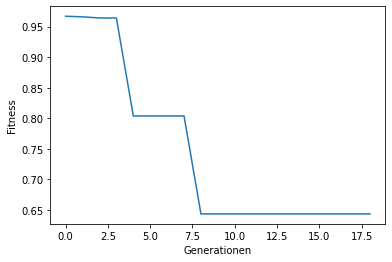

In [9]:
import matplotlib.pyplot as plt
plt.xlabel("Generationen")
plt.ylabel("Fitness")
plt.plot(cf_gen.plot_x[:],cf_gen.plot_y[:])